# Importamos librerías

In [1]:
import tensorflow as tf
import pathlib
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import keras

# Primera prueba(Imagen propia)

## Importamos imagen de pureba

In [2]:
path1 = '../../Data/Processed/img_prop/01.jpg'

In [3]:
or_prueba1 = tf.keras.preprocessing.image.load_img(path1)
or_prueba1 = tf.image.resize(or_prueba1, [178,218])
or_prueba1 /= 255.0 
print(or_prueba1.shape)
print(or_prueba1.dtype)

(178, 218, 3)
<dtype: 'float32'>


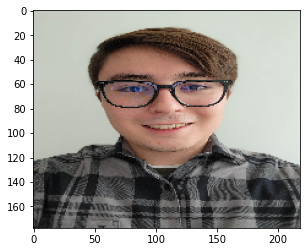

In [4]:
plt.imshow(or_prueba1)

In [5]:
or_prueba1 =or_prueba1[None, :]

## Importamos el modelo y hacemos predicciones

In [6]:
class ResidualUnit(keras.layers.Layer):
    def __init__(self, filters, strides=1, activation="relu",**kwargs):
        super().__init__(**kwargs)
        self.activation = keras.activations.get(activation)
        self.main_layers = [
                            keras.layers.Conv2D(filters, 3, strides=strides,
                                            padding="same",use_bias=False),
                            self.activation,
                            keras.layers.Conv2D(filters, 3, strides=1,
                                            padding="same",use_bias=False)]
        self.skip_layers = []
        if strides > 1:
            self.skip_layers = [
                          keras.layers.Conv2D(filters, 1, strides=strides,
                                              padding="same",use_bias=False)]

    def get_config(self):
        config = super().get_config().copy()
        config.update({
            'activation' : self.activation,
            'main_layers' : self.main_layers,
            'skip_layers' : self.skip_layers,})
        return config

    def call(self, inputs):
        skip_x = inputs
        x = inputs
        for layer in self.main_layers:
            x = layer(x)
        for layer in self.skip_layers:
            skip_x = layer(skip_x)
    
        return self.activation(keras.layers.add([x, skip_x]))
    
new_model = keras.models.Sequential()
new_model.add(keras.layers.Conv2D(64, 7, strides=2, input_shape=[178, 218, 3],
                              padding="same", use_bias=False))
#model.add(keras.layers.BatchNormalization())
new_model.add(keras.layers.Activation("relu"))
new_model.add(keras.layers.MaxPool2D(pool_size=3, strides=2, padding="same"))
prev_filters = 64
for filters in [64] * 3 + [128] * 4 + [256] * 6 + [512] * 3:
    strides = 1 if filters == prev_filters else 2
    new_model.add(ResidualUnit(filters, strides=strides))
    prev_filters = filters
new_model.add(keras.layers.GlobalAvgPool2D())
new_model.add(keras.layers.Flatten())
new_model.add(keras.layers.Dense(32, activation="sigmoid"))

new_model.load_weights('path_to_my_weights4.h5')

In [7]:
new_model.compile(loss='BinaryCrossentropy',
              optimizer='adam',
              metrics='binary_accuracy')

In [8]:
new_predictions = new_model.predict(or_prueba1)
print(new_predictions)

1/1 [==============================] - 0s 236ms/step
[[1.7664281e-01 4.4418806e-03 1.0058976e-01 5.8203842e-04 7.2904611e-03
  2.7269882e-01 3.4681442e-01 1.2065190e-01 1.8544879e-03 4.8301570e-02
  3.5293404e-02 6.1805855e-02 6.5215947e-03 3.6796540e-04 4.8356608e-01
  3.0787319e-02 5.6804315e-04 1.5587933e-02 9.3811393e-01 1.2176567e-01
  7.1366280e-02 3.0349512e-02 4.9375412e-01 7.5687282e-02 2.1787969e-02
  6.8222292e-02 6.2136059e-03 1.9485911e-05 3.0296901e-02 3.6209919e-02
  6.2077850e-02 9.3993205e-01]]


In [9]:
new_predictions.round()

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]],
      dtype=float32)

In [10]:
new_predictions_2 =[]
for i in range(0,32): 
    if new_predictions[0,i]>0.2: 
        new_predictions_2.append(1)
    else: 
        new_predictions_2.append(0)

In [11]:
df=pd.read_csv('../../Data/Processed/atributes_wd.csv')
columns_names = df.columns.values
columns_names = np.delete(columns_names, 0)

In [12]:
for i in range(0,32): 
    if new_predictions_2[i]==1: 
        print("This person has/is", columns_names[i])

This person has/is Big_Lips
This person has/is Big_Nose
This person has/is Eyeglasses
This person has/is Male
This person has/is No_Beard
This person has/is Young


# Segunda prueba

## Importamos imagen

In [13]:
path2 = '../../Data/Processed/img_prop/descarga.jpg'

In [14]:
or_prueba2 = tf.keras.preprocessing.image.load_img(path2)
or_prueba2 = tf.image.resize(or_prueba2, [178,218])
or_prueba2 /= 255.0 
print(or_prueba2.shape)
print(or_prueba2.dtype)

(178, 218, 3)
<dtype: 'float32'>


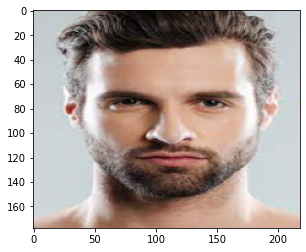

In [15]:
plt.imshow(or_prueba2)

In [16]:
or_prueba2 =or_prueba2[None, :]

## Importamos el modelo y hacemos predicciones

In [17]:
new_predictions = new_model.predict(or_prueba2)

1/1 [==============================] - 0s 45ms/step


In [18]:
new_predictions_2 =[]
for i in range(0,32): 
    if new_predictions[0,i]>0.2: 
        new_predictions_2.append(1)
    else: 
        new_predictions_2.append(0)

In [19]:
for i in range(0,32): 
    if new_predictions_2[i]==1: 
        print("This person has/is", columns_names[i])

This person has/is Big_Nose
This person has/is Blurry
This person has/is Goatee
This person has/is Male
This person has/is Mouth_Slightly_Open
This person has/is Mustache
This person has/is Narrow_Eyes
This person has/is Sideburns
This person has/is Young


# Tercera prueba

## Importamos la imagen

In [20]:
path3 = '../../Data/Processed/img_prop/test_me.jpg'

In [21]:
or_prueba3 = tf.keras.preprocessing.image.load_img(path3)
or_prueba3 = tf.image.resize(or_prueba3, [178,218])
or_prueba3 /= 255.0 
print(or_prueba3.shape)
print(or_prueba3.dtype)

(178, 218, 3)
<dtype: 'float32'>


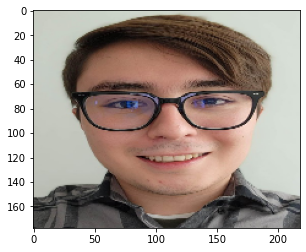

In [22]:
plt.imshow(or_prueba3)

In [23]:
or_prueba3 =or_prueba3[None, :]

## Importamos el modelo y hacemos predicciones

In [24]:
new_predictions = new_model.predict(or_prueba3)

1/1 [==============================] - 0s 42ms/step


In [25]:
new_predictions_3 =[]
for i in range(0,32): 
    if new_predictions[0,i]>0.2: 
        new_predictions_3.append(1)
    else: 
        new_predictions_3.append(0)

In [26]:
for i in range(0,32): 
    if new_predictions_3[i]==1: 
        print("This person has/is", columns_names[i])

This person has/is Big_Nose
This person has/is Eyeglasses
This person has/is Male
This person has/is Mouth_Slightly_Open
This person has/is No_Beard
This person has/is Pointy_Nose
This person has/is Wavy_Hair
This person has/is Young
